In [1]:
import sys,os
sys.path.append('..')
from ccat_holo.Pyccat import CCAT_holo
import time
import torch as T
import numpy as np
import h5py

In [2]:
dz_Rx=715
# 1. Model folder
Model_folder='../CCAT_model_Half'
# 2. Configuration of the Holography system
holo_setup={'Rx1':([0,0,dz_Rx],'../scan/501/on-axis.txt'), 
            #'Rx2':([400,400,dz_Rx],'../scan/501/pos_pos_near.txt'),
            #'Rx3':([400,-400,dz_Rx],'../scan/501/pos_neg_near.txt'),
            #'Rx4':([-400,400,dz_Rx],'../scan/501/neg_pos_near.txt'),
            #'Rx5':([-400,-400,dz_Rx],'../scan/501/neg_neg_near.txt')
            }
# Define 5 receiver positions in the 'Coord_Rx' system, e.g [+/-400,+/-400,600]
# and their field points that are stored in file 'scan/400_400_600.txt'. The field
# points of the measured beam maps are from the read out of the telescope coders.
#####################
# 3. Output_folder is the folder used to store the intermediate data of the first
#    beam calculation and the analysing results.
Output_folder='test_x'

# 4. Create the FYST holography Model and check the telescope model and 
# holographic setup in the 3D view.
Model=CCAT_holo(Model_folder,Output_folder,holo_conf=holo_setup)

FYST telescope model has been created!!


In [3]:
#Model.view() # Show 3D FYST model and its receivers.
#Model.view_Rx(Rx=['Rx2']) # This method can highlight the chosen reciever horns.

In [4]:
# 5. Running the time-consuming first beam calculation.
''' We only need to run this calculation in the beginning
 of the data analysis. All the setup defined in 'holo_config'
 will be computed. The intermediate computed data will be
 stored in the directory 'output_folder', here is 'Analysis1'.
'''
Model.First_Beam_cal(S2_init=np.zeros((5,39)),S1_init=np.zeros((5,34+9)),Matrix=False)


The holographic setup:
Rx1 : [0, 0, 715] ../scan/test/on-axis.txt

***Start the initial beam calculations 
***and prepare the required Matrixes used to speed up the forward beam calculations.
Rx1 : [0, 0, 715] ../scan/test/on-axis.txt
time used: 7.891737800000001


Beam Rx: test_x/data_Rx_dx0_dy0_dz715.h5py


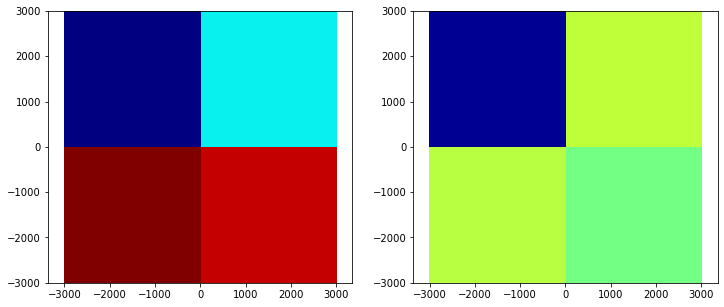

[0] [1] 5.893764160585906


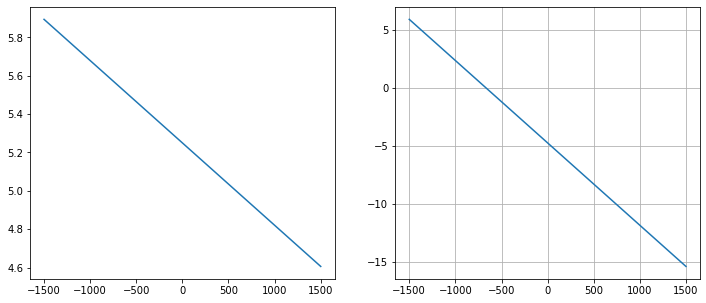

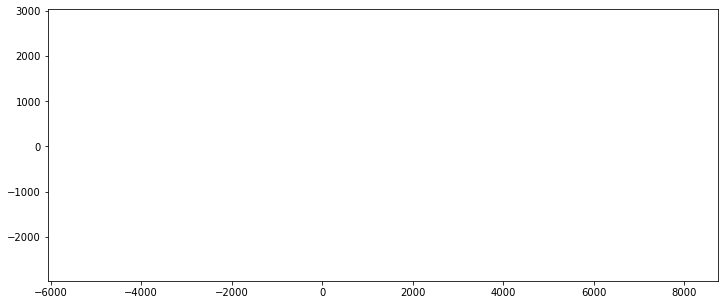

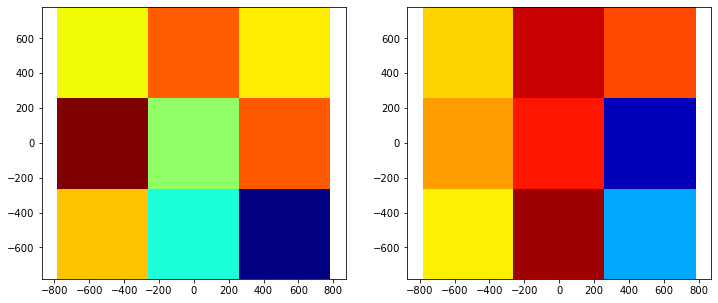

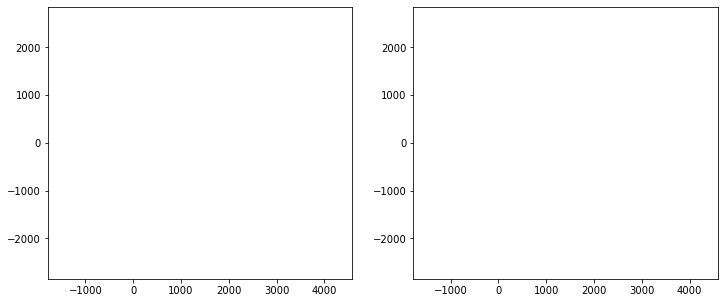

In [5]:
# 5.1 check the beams
#dz_Rx=705
Model.plot_beam(Output_folder+'/data_Rx_dx0_dy0_dz'+str(dz_Rx)+'.h5py')
#Model.plot_beam(Output_folder+'/data_Rx_dx400_dy400_dz'+str(dz_Rx)+'.h5py')
#Model.plot_beam(Output_folder+'/data_Rx_dx400_dy-400_dz'+str(dz_Rx)+'.h5py')
#Model.plot_beam(Output_folder+'/data_Rx_dx-400_dy400_dz'+str(dz_Rx)+'.h5py')
#Model.plot_beam(Output_folder+'/data_Rx_dx-400_dy-400_dz'+str(dz_Rx)+'.h5py')

In [6]:
# 6. Make the farward beam calculation function, (Model.FF), with using
# the data produced by the First beam calculations. Here, we can use the movements
# of the panel adjusters or coefficients of Zernike polynomial as the fitting paramters.
# If fitting_param is 'zernike', the surface deviations will be described by 
# the summation of zernike polynimals, and the maximum zernike order is 7th.
#Model.mk_FF(fitting_param='panel adjusters',Device=T.device('cpu'))
#Model.mk_FF(fitting_param='panel adjusters',Device=T.device('cuda:0'))

# The function also supports the GPU acceleration by setting the 'Device' to 
# 'T.device('cuda:0')'.

# Model.FF(adjusters, Para_Amp, Para_phase)

In [7]:
import h5py
filename='test_x/data_Rx_dx0_dy0_dz715.h5py'
with h5py.File(filename,'r') as f:
    print(f['F_beam_real'][:])
    print(f['F_beam_imag'][:])

[ 1.69672478  1.76707186  0.35980682 -0.16911116]
[-0.09522536  0.87311305  0.19764892 -0.01845842]
